# DBA5101 Analytics in Managerial Economics
# Wong Cheuk Wah (A0280543H)

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import statsmodels.api as sm
import linearmodels.iv.model as lm
from linearmodels import PanelOLS
import warnings 
warnings.filterwarnings('ignore') 

In [126]:
df = pd.read_csv('data_HW2.csv')
df.drop(columns = 'Unnamed: 0', inplace=True)
busi_df = df[df['sector']=='business']
edu_df = df[df['sector']=='education']
df

,sector,revenue_q1,revenue_q2,revenue_q3,revenue_q4,revenue_q5,revenue_q6,revenue_q7,revenue_q8,price_q1,...,price_q7,price_q8,quantity_q1,quantity_q2,quantity_q3,quantity_q4,quantity_q5,quantity_q6,quantity_q7,quantity_q8
0,business,701.180097,651.553732,616.554372,677.676072,697.850791,721.457361,696.513998,643.205826,250,...,250.0,250.0,1783.0,1616.0,1786.0,1695.0,1719.0,1775.0,1750.0,1436.0
1,education,540.735403,613.711988,635.483566,648.435095,661.271172,630.720753,606.592341,683.876273,100,...,100.0,100.0,1275.0,1776.0,1663.0,1693.0,1746.0,1677.0,1523.0,1756.0
2,education,316.432340,334.445888,373.989586,347.558637,315.030804,284.482328,320.487448,342.056275,100,...,130.0,130.0,1120.0,743.0,930.0,1199.0,674.0,743.0,658.0,921.0
3,business,815.657070,802.383396,869.026329,809.321133,797.433790,765.775959,736.972483,816.065622,250,...,250.0,250.0,2032.0,2003.0,2462.0,2022.0,2154.0,1878.0,1860.0,2140.0
4,business,687.883861,643.046228,708.405631,758.979645,755.221864,863.949977,836.292719,936.434361,250,...,250.0,250.0,1646.0,1667.0,1990.0,2061.0,2048.0,2112.0,1856.0,2302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,education,900.578828,831.140164,878.145363,937.027819,956.083252,1017.500883,1048.393657,1072.592018,100,...,100.0,100.0,2189.0,2129.0,2301.0,2356.0,2294.0,2645.0,2671.0,2390.0
246,business,390.052309,440.497148,410.900682,433.447865,392.182791,446.756460,409.188811,427.323960,250,...,325.0,325.0,1402.0,1207.0,1148.0,1226.0,862.0,1126.0,883.0,1113.0
247,education,548.117333,512.053765,465.012177,472.393553,455.837718,418.112363,463.203013,517.117197,100,...,100.0,100.0,1570.0,1671.0,1445.0,1159.0,1338.0,1024.0,1229.0,1287.0
248,education,907.407390,1032.229750,1166.638411,1160.742740,1265.293689,1156.812065,1214.357249,1390.663507,100,...,130.0,130.0,2199.0,2256.0,2718.0,2614.0,2382.0,2449.0,2188.0,2890.0


# Question 1
Find the control and treatment groups for business customers, and find the control and treatment groups for education customers separately. Describe shortly how you distinguish the control and treatment groups

## Business sector

In [127]:
# Filter the price data 
busi_df.loc[:,df.columns.str.startswith('price')].describe()

,price_q1,price_q2,price_q3,price_q4,price_q5,price_q6,price_q7,price_q8
count,165.0,165.0,165.0,165.0,165.000000,165.000000,165.000000,165.000000
mean,250.0,250.0,250.0,250.0,292.272727,292.272727,292.272727,292.272727
std,0.0,0.0,0.0,0.0,37.308268,37.308268,37.308268,37.308268
min,250.0,250.0,250.0,250.0,250.000000,250.000000,250.000000,250.000000
25%,250.0,250.0,250.0,250.0,250.000000,250.000000,250.000000,250.000000
50%,250.0,250.0,250.0,250.0,325.000000,325.000000,325.000000,325.000000
75%,250.0,250.0,250.0,250.0,325.000000,325.000000,325.000000,325.000000
max,250.0,250.0,250.0,250.0,325.000000,325.000000,325.000000,325.000000


In [128]:
#Distinguish control and treatment
busi_df.loc[:,'treatment'] = np.where(busi_df['price_q5']==325.0, 1, 0)
busi_df

,sector,revenue_q1,revenue_q2,revenue_q3,revenue_q4,revenue_q5,revenue_q6,revenue_q7,revenue_q8,price_q1,...,price_q8,quantity_q1,quantity_q2,quantity_q3,quantity_q4,quantity_q5,quantity_q6,quantity_q7,quantity_q8,treatment
0,business,701.180097,651.553732,616.554372,677.676072,697.850791,721.457361,696.513998,643.205826,250,...,250.0,1783.0,1616.0,1786.0,1695.0,1719.0,1775.0,1750.0,1436.0,0
3,business,815.657070,802.383396,869.026329,809.321133,797.433790,765.775959,736.972483,816.065622,250,...,250.0,2032.0,2003.0,2462.0,2022.0,2154.0,1878.0,1860.0,2140.0,0
4,business,687.883861,643.046228,708.405631,758.979645,755.221864,863.949977,836.292719,936.434361,250,...,250.0,1646.0,1667.0,1990.0,2061.0,2048.0,2112.0,1856.0,2302.0,0
5,business,170.990770,187.834438,199.986545,201.501737,201.442434,221.664088,241.580510,251.954723,250,...,325.0,644.0,788.0,725.0,798.0,620.0,392.0,774.0,844.0,1
6,business,911.817913,961.984483,1032.275863,980.797485,1024.975637,1168.363744,1182.892301,1217.623897,250,...,325.0,2190.0,2338.0,2545.0,2256.0,1979.0,2789.0,2595.0,2571.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,business,444.743559,427.665633,488.414833,487.017735,483.092293,487.542866,448.413792,469.571246,250,...,325.0,1249.0,860.0,1431.0,1298.0,1035.0,1207.0,1009.0,1216.0,1
239,business,383.174985,423.322366,400.624405,405.501368,406.933777,440.455784,422.783615,420.176087,250,...,325.0,1192.0,1208.0,1127.0,1281.0,848.0,1010.0,1262.0,1116.0,1
243,business,507.693186,531.837890,590.976033,542.692689,489.920067,457.506230,525.610323,523.841711,250,...,250.0,1412.0,1170.0,1709.0,1448.0,1255.0,1369.0,1646.0,1365.0,0
244,business,239.890568,237.550070,258.990388,272.163196,273.262327,297.266720,331.132541,340.344273,250,...,250.0,893.0,519.0,685.0,911.0,892.0,749.0,1033.0,897.0,0


In [129]:
#Identify the treatment group for business customer
busi_treatment = busi_df[busi_df['treatment']==1]
busi_treatment

,sector,revenue_q1,revenue_q2,revenue_q3,revenue_q4,revenue_q5,revenue_q6,revenue_q7,revenue_q8,price_q1,...,price_q8,quantity_q1,quantity_q2,quantity_q3,quantity_q4,quantity_q5,quantity_q6,quantity_q7,quantity_q8,treatment
5,business,170.990770,187.834438,199.986545,201.501737,201.442434,221.664088,241.580510,251.954723,250,...,325.0,644.0,788.0,725.0,798.0,620.0,392.0,774.0,844.0,1
6,business,911.817913,961.984483,1032.275863,980.797485,1024.975637,1168.363744,1182.892301,1217.623897,250,...,325.0,2190.0,2338.0,2545.0,2256.0,1979.0,2789.0,2595.0,2571.0,1
8,business,950.301914,1067.638681,1027.513619,941.256146,990.179133,918.325843,841.500117,824.027753,250,...,325.0,2363.0,2529.0,2514.0,2371.0,2104.0,2043.0,1997.0,1851.0,1
10,business,617.281044,578.959447,553.081326,534.967001,590.200436,598.223818,543.428550,594.222770,250,...,325.0,1602.0,1626.0,1499.0,1519.0,1406.0,1285.0,1314.0,1399.0,1
13,business,867.403251,941.988284,857.074354,868.906297,785.976269,803.315129,750.948094,759.092129,250,...,325.0,1912.0,2408.0,2164.0,2165.0,2095.0,1961.0,1748.0,1723.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,business,527.834771,484.966377,440.244485,396.853841,399.441664,407.726970,453.827015,425.326221,250,...,325.0,1319.0,1401.0,1253.0,1311.0,905.0,1025.0,1215.0,1284.0,1
234,business,365.242179,395.209273,420.074539,412.154646,384.407404,358.794336,382.816037,388.814343,250,...,325.0,1114.0,1226.0,1117.0,993.0,916.0,816.0,850.0,1080.0,1
238,business,444.743559,427.665633,488.414833,487.017735,483.092293,487.542866,448.413792,469.571246,250,...,325.0,1249.0,860.0,1431.0,1298.0,1035.0,1207.0,1009.0,1216.0,1
239,business,383.174985,423.322366,400.624405,405.501368,406.933777,440.455784,422.783615,420.176087,250,...,325.0,1192.0,1208.0,1127.0,1281.0,848.0,1010.0,1262.0,1116.0,1


In [130]:
# Identify the control group for business customer
busi_control = busi_df[busi_df['treatment']==0]
busi_control

,sector,revenue_q1,revenue_q2,revenue_q3,revenue_q4,revenue_q5,revenue_q6,revenue_q7,revenue_q8,price_q1,...,price_q8,quantity_q1,quantity_q2,quantity_q3,quantity_q4,quantity_q5,quantity_q6,quantity_q7,quantity_q8,treatment
0,business,701.180097,651.553732,616.554372,677.676072,697.850791,721.457361,696.513998,643.205826,250,...,250.0,1783.0,1616.0,1786.0,1695.0,1719.0,1775.0,1750.0,1436.0,0
3,business,815.657070,802.383396,869.026329,809.321133,797.433790,765.775959,736.972483,816.065622,250,...,250.0,2032.0,2003.0,2462.0,2022.0,2154.0,1878.0,1860.0,2140.0,0
4,business,687.883861,643.046228,708.405631,758.979645,755.221864,863.949977,836.292719,936.434361,250,...,250.0,1646.0,1667.0,1990.0,2061.0,2048.0,2112.0,1856.0,2302.0,0
18,business,987.403368,973.106199,1098.512413,1153.443677,1108.310088,1101.629274,997.476670,956.937589,250,...,250.0,2307.0,2333.0,2586.0,2676.0,2794.0,2937.0,2454.0,2199.0,0
19,business,158.912722,175.648508,159.574298,155.252331,175.708166,175.465525,187.037024,192.291071,250,...,250.0,652.0,720.0,523.0,723.0,902.0,847.0,746.0,949.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,business,668.545248,619.507163,590.561419,611.893841,631.327813,640.511563,721.039078,819.107980,250,...,250.0,1547.0,1621.0,1418.0,1545.0,1473.0,1898.0,1727.0,1975.0,0
236,business,398.520656,427.254234,476.853992,476.397725,482.327048,521.870548,586.100091,598.321368,250,...,250.0,1342.0,1103.0,1341.0,1224.0,1532.0,1541.0,1545.0,1587.0,0
237,business,818.433445,825.559410,840.669192,902.766736,856.414745,877.067433,829.997456,926.183272,250,...,250.0,1746.0,2097.0,1948.0,2278.0,1996.0,2158.0,2069.0,2218.0,0
243,business,507.693186,531.837890,590.976033,542.692689,489.920067,457.506230,525.610323,523.841711,250,...,250.0,1412.0,1170.0,1709.0,1448.0,1255.0,1369.0,1646.0,1365.0,0


## Education sector

In [131]:
edu_df.loc[:,df.columns.str.startswith('price')].describe()

,price_q1,price_q2,price_q3,price_q4,price_q5,price_q6,price_q7,price_q8
count,85.0,85.0,85.0,85.0,85.000000,85.000000,85.000000,85.000000
mean,100.0,100.0,100.0,100.0,114.117647,114.117647,114.117647,114.117647
std,0.0,0.0,0.0,0.0,15.062893,15.062893,15.062893,15.062893
min,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000
25%,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000
50%,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000
75%,100.0,100.0,100.0,100.0,130.000000,130.000000,130.000000,130.000000
max,100.0,100.0,100.0,100.0,130.000000,130.000000,130.000000,130.000000


In [132]:
#Distinguish treatment and control
edu_df.loc[:,'treatment'] = np.where(edu_df['price_q5']==130.0, 1, 0)
edu_df

,sector,revenue_q1,revenue_q2,revenue_q3,revenue_q4,revenue_q5,revenue_q6,revenue_q7,revenue_q8,price_q1,...,price_q8,quantity_q1,quantity_q2,quantity_q3,quantity_q4,quantity_q5,quantity_q6,quantity_q7,quantity_q8,treatment
1,education,540.735403,613.711988,635.483566,648.435095,661.271172,630.720753,606.592341,683.876273,100,...,100.0,1275.0,1776.0,1663.0,1693.0,1746.0,1677.0,1523.0,1756.0,0
2,education,316.432340,334.445888,373.989586,347.558637,315.030804,284.482328,320.487448,342.056275,100,...,130.0,1120.0,743.0,930.0,1199.0,674.0,743.0,658.0,921.0,1
7,education,824.311870,851.815261,947.473189,969.169033,1001.539896,1023.537228,1119.931548,1128.450703,100,...,130.0,1912.0,2315.0,2424.0,2325.0,2169.0,1909.0,2378.0,2404.0,1
9,education,728.462313,799.231919,817.099740,854.271937,932.199319,966.681253,987.844611,996.388469,100,...,100.0,1966.0,1984.0,1861.0,1953.0,2363.0,2021.0,2383.0,2370.0,0
11,education,424.060606,414.701808,475.628554,522.901169,564.487901,627.196450,574.300772,603.291967,100,...,130.0,1314.0,1366.0,1479.0,1355.0,1216.0,1471.0,981.0,1356.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,education,750.133286,726.156239,793.493042,759.227955,829.324605,872.910827,912.804343,995.367084,100,...,100.0,1928.0,1773.0,1915.0,1999.0,1927.0,2153.0,2249.0,2182.0,0
245,education,900.578828,831.140164,878.145363,937.027819,956.083252,1017.500883,1048.393657,1072.592018,100,...,100.0,2189.0,2129.0,2301.0,2356.0,2294.0,2645.0,2671.0,2390.0,0
247,education,548.117333,512.053765,465.012177,472.393553,455.837718,418.112363,463.203013,517.117197,100,...,100.0,1570.0,1671.0,1445.0,1159.0,1338.0,1024.0,1229.0,1287.0,0
248,education,907.407390,1032.229750,1166.638411,1160.742740,1265.293689,1156.812065,1214.357249,1390.663507,100,...,130.0,2199.0,2256.0,2718.0,2614.0,2382.0,2449.0,2188.0,2890.0,1


In [133]:
#Identify the treatment group for educaiton customers
edu_treatment = edu_df[edu_df['treatment']==1]
edu_treatment

,sector,revenue_q1,revenue_q2,revenue_q3,revenue_q4,revenue_q5,revenue_q6,revenue_q7,revenue_q8,price_q1,...,price_q8,quantity_q1,quantity_q2,quantity_q3,quantity_q4,quantity_q5,quantity_q6,quantity_q7,quantity_q8,treatment
2,education,316.432340,334.445888,373.989586,347.558637,315.030804,284.482328,320.487448,342.056275,100,...,130.0,1120.0,743.0,930.0,1199.0,674.0,743.0,658.0,921.0,1
7,education,824.311870,851.815261,947.473189,969.169033,1001.539896,1023.537228,1119.931548,1128.450703,100,...,130.0,1912.0,2315.0,2424.0,2325.0,2169.0,1909.0,2378.0,2404.0,1
11,education,424.060606,414.701808,475.628554,522.901169,564.487901,627.196450,574.300772,603.291967,100,...,130.0,1314.0,1366.0,1479.0,1355.0,1216.0,1471.0,981.0,1356.0,1
25,education,474.006228,444.371054,452.615716,419.227407,404.216610,395.668125,381.835349,400.989267,100,...,130.0,1467.0,1265.0,1344.0,1084.0,856.0,986.0,786.0,716.0,1
34,education,771.297541,729.184255,670.294095,657.970958,660.199686,703.006031,739.655013,691.581894,100,...,130.0,1943.0,1717.0,1647.0,1499.0,1410.0,1251.0,1528.0,1530.0,1
45,education,364.581091,407.612953,429.610111,408.145742,416.670442,383.835980,414.812916,374.126409,100,...,130.0,938.0,1269.0,1257.0,1135.0,987.0,732.0,946.0,819.0,1
51,education,853.659685,800.847825,826.662580,937.479230,984.730954,1067.819686,1090.429777,1137.331518,100,...,130.0,2134.0,2093.0,2092.0,2113.0,1946.0,2122.0,2140.0,2246.0,1
52,education,556.387770,580.908942,659.196254,601.841447,664.912755,657.141821,618.661985,636.087795,100,...,130.0,1266.0,1497.0,1647.0,1548.0,1352.0,1166.0,1362.0,1330.0,1
53,education,565.328592,594.544073,653.817626,676.913134,758.854563,739.225951,840.074509,817.705178,100,...,130.0,1527.0,1429.0,1623.0,1866.0,1722.0,1500.0,1596.0,1516.0,1
55,education,409.448038,443.887146,438.417548,490.037830,467.011545,510.753426,545.104446,544.697668,100,...,130.0,893.0,1167.0,1225.0,1369.0,988.0,1094.0,1411.0,1346.0,1


In [134]:
#Identify the control group for educaiton customers
edu_control = edu_df[edu_df['treatment']==0]
edu_control

,sector,revenue_q1,revenue_q2,revenue_q3,revenue_q4,revenue_q5,revenue_q6,revenue_q7,revenue_q8,price_q1,...,price_q8,quantity_q1,quantity_q2,quantity_q3,quantity_q4,quantity_q5,quantity_q6,quantity_q7,quantity_q8,treatment
1,education,540.735403,613.711988,635.483566,648.435095,661.271172,630.720753,606.592341,683.876273,100,...,100.0,1275.0,1776.0,1663.0,1693.0,1746.0,1677.0,1523.0,1756.0,0
9,education,728.462313,799.231919,817.099740,854.271937,932.199319,966.681253,987.844611,996.388469,100,...,100.0,1966.0,1984.0,1861.0,1953.0,2363.0,2021.0,2383.0,2370.0,0
12,education,933.401199,898.046094,1020.193685,997.331644,1135.841985,1050.109364,1183.063042,1328.734568,100,...,100.0,2574.0,2268.0,2491.0,2229.0,2721.0,2627.0,2656.0,3235.0,0
33,education,559.877389,552.276492,513.695407,463.580676,448.818413,475.433511,543.421137,495.280646,100,...,100.0,1534.0,1389.0,1601.0,1173.0,1454.0,1220.0,1403.0,1232.0,0
35,education,945.318073,1065.479949,1144.402386,1178.079758,1096.169667,1231.852929,1216.302748,1178.844974,100,...,100.0,2322.0,2397.0,2669.0,2876.0,2748.0,2753.0,2835.0,2809.0,0
38,education,456.038694,463.107955,424.363920,385.450079,364.388927,334.021851,319.434860,325.986554,100,...,100.0,1401.0,1195.0,1235.0,1251.0,1123.0,895.0,942.0,1116.0,0
43,education,674.983678,710.665717,750.799031,805.131536,776.260079,830.642489,771.411215,793.892573,100,...,100.0,1712.0,1774.0,1813.0,1997.0,1968.0,2115.0,2046.0,2010.0,0
50,education,524.961866,565.284008,632.369324,574.125919,653.269656,744.156026,755.002219,830.990489,100,...,100.0,1429.0,1340.0,1638.0,1511.0,1577.0,1769.0,2119.0,2059.0,0
62,education,145.007761,135.026249,147.457893,152.898808,167.444283,161.794982,178.233498,182.401782,100,...,100.0,620.0,539.0,925.0,807.0,648.0,414.0,722.0,635.0,0
67,education,443.100173,442.989697,410.925451,444.990094,411.119152,449.067829,433.195620,432.608215,100,...,100.0,1280.0,1433.0,1415.0,1366.0,1066.0,1323.0,1242.0,1098.0,0


# Question 2

## Data Transformation

In [135]:
# Transform busi_df 
transformed_busi_df = pd.DataFrame()
price_cols = [c for c in busi_df.columns if c.startswith('price')]
quantity_cols = [c for c in busi_df.columns if c.startswith('quantity')]
revenue_cols = [c for c in busi_df.columns if c.startswith('revenue')]

busi_df.reset_index(inplace=True)

i=0
for row in range(busi_df.shape[0]):
    for col in busi_df[revenue_cols]:
        transformed_busi_df.loc[i,'customer'] = busi_df.index[row]
        transformed_busi_df.loc[i, 'revenue'] = busi_df.loc[row, col]
        i+=1

i = 0
for row in range(busi_df.shape[0]):
    for col in busi_df[price_cols]:
        transformed_busi_df.loc[i, 'treatment'] = busi_df.loc[row, 'treatment']
        transformed_busi_df.loc[i, 'price'] = busi_df.loc[row, col]
        i+=1

i = 0
for row in range(busi_df.shape[0]):
    quarter = 1
    for col in busi_df[quantity_cols]:
        if quarter <= 4:
            transformed_busi_df.loc[i, 'quarter'] = quarter
            transformed_busi_df.loc[i, 'after'] = 0
        else:
            transformed_busi_df.loc[i, 'quarter'] = quarter
            transformed_busi_df.loc[i, 'after'] = 1
        transformed_busi_df.loc[i, 'quantity'] = busi_df.loc[row, col]
        i+=1
        quarter +=1


transformed_busi_df['treatment*after'] = transformed_busi_df['treatment'] * transformed_busi_df['after'] 

transformed_busi_df['log(quantity)'] = np.log(transformed_busi_df['quantity'])
transformed_busi_df['log(price)'] = np.log(transformed_busi_df['price'])
transformed_busi_df['log(revenue)'] = np.log(transformed_busi_df['revenue'])

transformed_busi_df = transformed_busi_df[['customer','quarter','treatment', 'after', 'treatment*after', 'revenue', 'price', 'quantity', 'log(quantity)', 'log(price)', 'log(revenue)']]
transformed_busi_df

,customer,quarter,treatment,after,treatment*after,revenue,price,quantity,log(quantity),log(price),log(revenue)
0,0.0,1.0,0.0,0.0,0.0,701.180097,250.0,1783.0,7.486053,5.521461,6.552765
1,0.0,2.0,0.0,0.0,0.0,651.553732,250.0,1616.0,7.387709,5.521461,6.479360
2,0.0,3.0,0.0,0.0,0.0,616.554372,250.0,1786.0,7.487734,5.521461,6.424147
3,0.0,4.0,0.0,0.0,0.0,677.676072,250.0,1695.0,7.435438,5.521461,6.518669
4,0.0,5.0,0.0,1.0,0.0,697.850791,250.0,1719.0,7.449498,5.521461,6.548005
...,...,...,...,...,...,...,...,...,...,...,...
1315,164.0,4.0,1.0,0.0,0.0,433.447865,250.0,1226.0,7.111512,5.521461,6.071772
1316,164.0,5.0,1.0,1.0,1.0,392.182791,325.0,862.0,6.759255,5.783825,5.971728
1317,164.0,6.0,1.0,1.0,1.0,446.756460,325.0,1126.0,7.026427,5.783825,6.102014
1318,164.0,7.0,1.0,1.0,1.0,409.188811,325.0,883.0,6.783325,5.783825,6.014177


In [136]:
# Transform edu_df 
transformed_edu_df = pd.DataFrame()
price_cols = [c for c in edu_df.columns if c.startswith('price')]
quantity_cols = [c for c in edu_df.columns if c.startswith('quantity')]
revenue_cols = [c for c in edu_df.columns if c.startswith('revenue')]

edu_df.reset_index(inplace=True)

i=0
for row in range(edu_df.shape[0]):
    for col in edu_df[revenue_cols]:
        transformed_edu_df.loc[i,'customer'] = edu_df.index[row]
        transformed_edu_df.loc[i, 'revenue'] = edu_df.loc[row, col]
        i+=1

i = 0
for row in range(edu_df.shape[0]):
    for col in edu_df[price_cols]:
        transformed_edu_df.loc[i, 'treatment'] = edu_df.loc[row, 'treatment']
        transformed_edu_df.loc[i, 'price'] = edu_df.loc[row, col]
        i+=1

i = 0
for row in range(edu_df.shape[0]):
    quarter = 1
    for col in edu_df[quantity_cols]:
        if quarter <= 4:
            transformed_edu_df.loc[i, 'quarter'] = quarter
            transformed_edu_df.loc[i, 'after'] = 0
        else:
            transformed_edu_df.loc[i, 'quarter'] = quarter
            transformed_edu_df.loc[i, 'after'] = 1
        transformed_edu_df.loc[i, 'quantity'] = edu_df.loc[row, col]
        i+=1
        quarter +=1

transformed_edu_df['treatment*after'] = transformed_edu_df['treatment'] * transformed_edu_df['after']

transformed_edu_df['log(quantity)'] = np.log(transformed_edu_df['quantity'])
transformed_edu_df['log(price)'] = np.log(transformed_edu_df['price'])
transformed_edu_df['log(revenue)'] = np.log(transformed_edu_df['revenue'])

transformed_edu_df = transformed_edu_df[['customer','quarter','treatment', 'after', 'treatment*after', 'revenue', 'price', 'quantity', 'log(revenue)', 'log(price)', 'log(quantity)']]
transformed_edu_df

,customer,quarter,treatment,after,treatment*after,revenue,price,quantity,log(revenue),log(price),log(quantity)
0,0.0,1.0,0.0,0.0,0.0,540.735403,100.0,1275.0,6.292930,4.605170,7.150701
1,0.0,2.0,0.0,0.0,0.0,613.711988,100.0,1776.0,6.419526,4.605170,7.482119
2,0.0,3.0,0.0,0.0,0.0,635.483566,100.0,1663.0,6.454386,4.605170,7.416378
3,0.0,4.0,0.0,0.0,0.0,648.435095,100.0,1693.0,6.474562,4.605170,7.434257
4,0.0,5.0,0.0,1.0,0.0,661.271172,100.0,1746.0,6.494164,4.605170,7.465083
...,...,...,...,...,...,...,...,...,...,...,...
675,84.0,4.0,1.0,0.0,0.0,747.188322,100.0,1631.0,6.616317,4.605170,7.396949
676,84.0,5.0,1.0,1.0,1.0,698.081183,130.0,1426.0,6.548335,4.867534,7.262629
677,84.0,6.0,1.0,1.0,1.0,677.520436,130.0,1334.0,6.518440,4.867534,7.195937
678,84.0,7.0,1.0,1.0,1.0,629.235756,130.0,1519.0,6.444506,4.867534,7.325808


## Regression Analysis
By considering all data points & take log to account for the percentage change

### Business Sector

In [137]:
#For business
transformed_busi_df.set_index(['customer', 'quarter'], inplace = True)
Y = transformed_busi_df['log(quantity)']
x = transformed_busi_df[['treatment','after', 'treatment*after', 'log(revenue)']]
x = sm.add_constant(x)

#busi_model = sm.OLS(Y, x).fit()
busi_model = PanelOLS(Y, x, entity_effects = True, time_effects = True, drop_absorbed=True).fit()

print(busi_model)

                          PanelOLS Estimation Summary                           
Dep. Variable:          log(quantity)   R-squared:                        0.2398
Estimator:                   PanelOLS   R-squared (Between):              0.9366
No. Observations:                1320   R-squared (Within):               0.2464
Date:                Fri, Oct 27 2023   R-squared (Overall):              0.8851
Time:                        00:42:24   Log-likelihood                    787.37
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      180.72
Entities:                         165   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(2,1146)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             180.72
                            

In [138]:
busi_percent_change_quantity = busi_model.params['treatment*after']
busi_percent_change_price = (325-250)/250
busi_elasticity = busi_percent_change_quantity / busi_percent_change_price
busi_elasticity

-0.49157599399696117

### Education Sector

In [139]:
#For education
transformed_edu_df.set_index(['customer', 'quarter'], inplace = True)
Y = transformed_edu_df['log(quantity)']
x = transformed_edu_df[['treatment','after', 'treatment*after', 'log(revenue)']]
x = sm.add_constant(x)

#edu_model = sm.OLS(Y, x).fit()
edu_model = PanelOLS(Y, x, entity_effects = True, time_effects = True, drop_absorbed=True).fit()

print(edu_model)

                          PanelOLS Estimation Summary                           
Dep. Variable:          log(quantity)   R-squared:                        0.2168
Estimator:                   PanelOLS   R-squared (Between):              0.9655
No. Observations:                 680   R-squared (Within):               0.2662
Date:                Fri, Oct 27 2023   R-squared (Overall):              0.8417
Time:                        00:42:24   Log-likelihood                    23.122
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      81.083
Entities:                          85   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                   F(2,586)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             81.083
                            

In [140]:
edu_percent_change_quantity = edu_model.params['treatment*after'] 
edu_percent_change_price = (130-100)/100
edu_elasticity = edu_percent_change_quantity / edu_percent_change_price
edu_elasticity

-1.351411008165627

# Question 3

## Price Discrimination

### Business Sector

In [141]:
transformed_busi_df.reset_index(inplace=True)
pretreat_busi = transformed_busi_df[transformed_busi_df['quarter']<=4]

initial_quantity = pretreat_busi.quantity.sum()
initial_price = 250

price_lst = []
price_percent_lst = []
quantity_lst = []
quantity_percent_lst = []
revenue_lst = []

pd_busi = pd.DataFrame()


for new_price in range(1, 1000): #potential price range
    percent_change_price = (new_price - initial_price)/initial_price
    percent_change_quantity = busi_elasticity * percent_change_price 
    new_quantity = initial_quantity * (1 + percent_change_quantity)
    revenue = new_price * new_quantity
    if revenue <= 0: #Early stopping
        break
    else:
        price_lst.append(new_price)
        price_percent_lst.append(percent_change_price)
        quantity_percent_lst.append(percent_change_quantity)
        quantity_lst.append(new_quantity)
        revenue_lst.append(revenue)

pd_busi['price'] = price_lst
pd_busi['price_change'] = price_percent_lst
pd_busi['quantity'] = quantity_lst
pd_busi['quantity_change'] = quantity_percent_lst
pd_busi['revenue'] = revenue_lst

busi_max_revenue = pd_busi['revenue'].max()
busi_optimal_price = pd_busi[pd_busi['revenue'] == pd_busi['revenue'].max()]['price'].iloc[0]
print('The maximum revenue is $', busi_max_revenue, 'when the price is $', busi_optimal_price  )
pd_busi[pd_busi['revenue'] == pd_busi['revenue'].max()]

The maximum revenue is $ 257447710.29346824 when the price is $ 379


,price,price_change,quantity,quantity_change,revenue
378,379,0.516,679281.557503,-0.253653,2.574477e+08


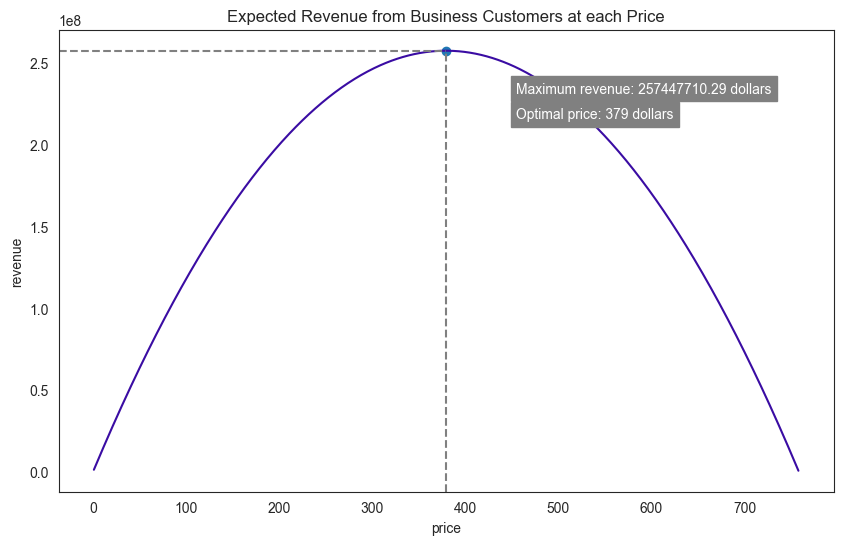

In [142]:
sns.set_style("white")
plt.figure(figsize=(10,6))
plt.scatter(busi_optimal_price, busi_max_revenue)
fig = sns.lineplot(data = pd_busi, x = 'price', y = 'revenue', color ="#3A0CA3")
fig.set(title = 'Expected Revenue from Business Customers at each Price')
fig.axvline(x = busi_optimal_price, ymax = 0.95, linestyle='dashed', color = 'grey')
fig.axhline(y = busi_max_revenue, xmax = 0.5, linestyle='dashed', color = 'grey')
fig.annotate('Maximum revenue: 257447710.29 dollars', (busi_optimal_price*1.2, busi_max_revenue*0.9), color ='white').set_backgroundcolor('grey');  #230000000
fig.annotate('Optimal price: 379 dollars', (busi_optimal_price*1.2, busi_max_revenue*0.84), color='white' ).set_backgroundcolor('grey');#215000000

### Education Sector

In [143]:
transformed_edu_df.reset_index(inplace=True)
pretreat_edu = transformed_edu_df[transformed_edu_df['quarter']<=4]

initial_quantity = pretreat_edu.quantity.sum()
initial_price = 100

price_lst = []
price_percent_lst = []
quantity_lst = []
quantity_percent_lst = []
revenue_lst = []

pd_edu = pd.DataFrame()


for new_price in range(1, 500): #potential price range
    
    percent_change_price = (new_price - initial_price)/initial_price
      
    percent_change_quantity = edu_elasticity * percent_change_price 
    
    new_quantity = initial_quantity * (1 + percent_change_quantity)
    
    revenue = new_price * new_quantity
    
    if revenue <= 0:  #Early stopping 
        break
    else:
        price_lst.append(new_price)
        price_percent_lst.append(percent_change_price)
        quantity_percent_lst.append(percent_change_quantity)
        quantity_lst.append(new_quantity)
        revenue_lst.append(revenue)

        
    
pd_edu['price'] = price_lst
pd_edu['price_change'] = price_percent_lst
pd_edu['quantity'] = quantity_lst
pd_edu['quantity_change'] = quantity_percent_lst
pd_edu['revenue'] = revenue_lst

edu_max_revenue = pd_edu['revenue'].max()
edu_optimal_price = pd_edu[pd_edu['revenue'] == pd_edu['revenue'].max()]['price'].iloc[0]
print('The maximum revenue is $', edu_max_revenue, 'when the price is $', edu_optimal_price  )
pd_edu[pd_edu['revenue'] == pd_edu['revenue'].max()]

The maximum revenue is $ 48849625.39830488 when the price is $ 87


,price,price_change,quantity,quantity_change,revenue
86,87,-0.13,561489.947107,0.175683,4.884963e+07


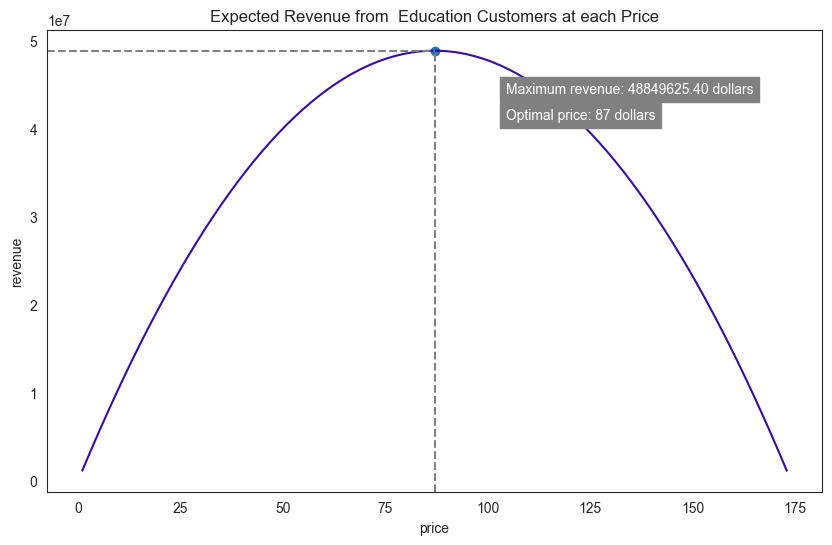

In [144]:
sns.set_style("white")
plt.figure(figsize=(10,6))
plt.scatter(edu_optimal_price, edu_max_revenue)
fig = sns.lineplot(data = pd_edu, x = 'price', y = 'revenue', color ="#3A0CA3")
fig.set(title = 'Expected Revenue from  Education Customers at each Price')
fig.axvline(x = edu_optimal_price, ymax = 0.95, linestyle='dashed', color = 'grey')
fig.axhline(y = edu_max_revenue, xmax = 0.5, linestyle='dashed', color = 'grey')
fig.annotate('Maximum revenue: 48849625.40 dollars', (edu_optimal_price*1.2, edu_max_revenue*0.9), color = 'white').set_backgroundcolor('grey');
fig.annotate('Optimal price: 87 dollars', (edu_optimal_price*1.2, edu_max_revenue*0.84), color ='white').set_backgroundcolor('grey');

## Uniform Pricing

In [145]:
# Merge the business and education customers' quantities and revenues based on their price. 
uniform_df = pd.merge(pd_busi, pd_edu, on = 'price', how = 'left', suffixes = ('_busi', '_edu'))
uniform_df.fillna(0, inplace=True)

# Aggregate their revenues at each price as the revenue under uniform pricing
uniform_df['total_revenue'] = uniform_df['revenue_busi']+uniform_df['revenue_edu']
uniform_df

,price,price_change_busi,quantity_busi,quantity_change_busi,revenue_busi,price_change_edu,quantity_edu,quantity_change_edu,revenue_edu,total_revenue
0,1,-0.996,1.355756e+06,0.489610,1.355756e+06,-0.99,1.116547e+06,1.337897,1.116547e+06,2.472303e+06
1,2,-0.992,1.353967e+06,0.487643,2.707933e+06,-0.98,1.110093e+06,1.324383,2.220185e+06,4.928119e+06
2,3,-0.988,1.352177e+06,0.485677,4.056531e+06,-0.97,1.103639e+06,1.310869,3.310916e+06,7.367447e+06
3,4,-0.984,1.350387e+06,0.483711,5.401550e+06,-0.96,1.097184e+06,1.297355,4.388738e+06,9.790287e+06
4,5,-0.980,1.348598e+06,0.481744,6.742989e+06,-0.95,1.090730e+06,1.283840,5.453651e+06,1.219664e+07
...,...,...,...,...,...,...,...,...,...,...
753,754,2.016,8.175620e+03,-0.991017,6.164417e+06,0.00,0.000000e+00,0.000000,0.000000e+00,6.164417e+06
754,755,2.020,6.386004e+03,-0.992984,4.821433e+06,0.00,0.000000e+00,0.000000,0.000000e+00,4.821433e+06
755,756,2.024,4.596388e+03,-0.994950,3.474870e+06,0.00,0.000000e+00,0.000000,0.000000e+00,3.474870e+06
756,757,2.028,2.806773e+03,-0.996916,2.124727e+06,0.00,0.000000e+00,0.000000,0.000000e+00,2.124727e+06


In [146]:
uniform_max_revenue = uniform_df['total_revenue'].max()
uniform_optimal_price = uniform_df[uniform_df['total_revenue'] == uniform_df['total_revenue'].max()]['price'].iloc[0]
print("Under uniform pricing, the optimal price is", uniform_optimal_price , "dollars which yields revenue", uniform_max_revenue)

Under uniform pricing, the optimal price is 379 dollars which yields revenue 257447710.29346824


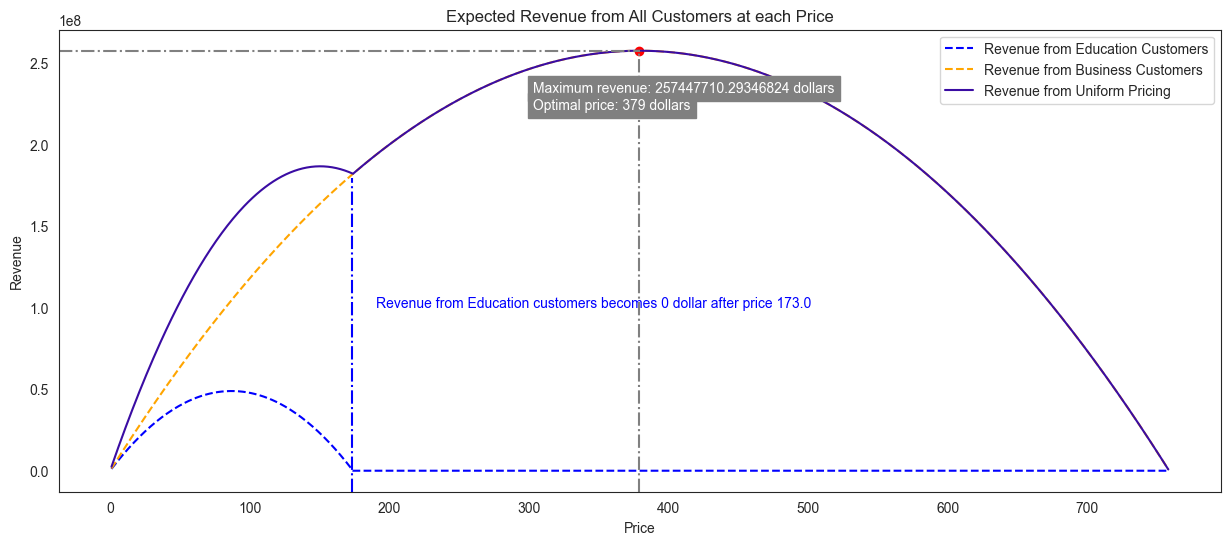

In [147]:
plt.figure(figsize=(15,6))

fig = sns.lineplot(data = uniform_df, x = 'price', y = 'revenue_edu', color ="blue", linestyle = 'dashed', label = 'Revenue from Education Customers')
fig = sns.lineplot(data = uniform_df, x = 'price', y = 'revenue_busi', color ="orange", linestyle = 'dashed', label = 'Revenue from Business Customers')
fig = sns.lineplot(data = uniform_df, x = 'price', y = 'total_revenue', color ="#3A0CA3", linestyle = 'solid', label = 'Revenue from Uniform Pricing')


fig.set(title = 'Expected Revenue from All Customers at each Price')
fig.axvline(x = uniform_optimal_price, ymax = 0.95, linestyle='dashdot', color = 'grey')
fig.axvline(x = pd_edu.iloc[-1]['price'], ymax = 0.68, linestyle='dashdot', color = 'blue')
fig.axhline(y = uniform_max_revenue, xmax = 0.5, linestyle='dashdot', color = 'grey')
plt.scatter(uniform_optimal_price, uniform_max_revenue, color = 'red')

plt.xlabel("Price")
plt.ylabel("Revenue")

last_price = pd_edu.iloc[-1]['price']

fig.annotate(f'Maximum revenue: {uniform_max_revenue} dollars', (uniform_optimal_price*0.8, uniform_max_revenue*0.9), color = 'white').set_backgroundcolor('grey');
fig.annotate(f'Optimal price: {uniform_optimal_price} dollars', (uniform_optimal_price*0.8, uniform_max_revenue*0.86), color ='white').set_backgroundcolor('grey');
fig.annotate(f'Revenue from Education customers becomes 0 dollar after price {last_price}', (last_price*1.1, 100000000), color ='blue');



## Changes in Revenues

In [148]:
diff = (busi_max_revenue + edu_max_revenue) - uniform_max_revenue
diff

48849625.39830488